<a href="https://colab.research.google.com/github/maskubica/python/blob/master/mini_projects/presidential_election_Poland_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

!pip install --upgrade geopandas
import geopandas as gpd

     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 306kB/s 
     |████████████████████████████████| 10.9MB 47.7MB/s 


In [2]:
!wget "https://prezydent2015.pkw.gov.pl/prezydent_2015_tura1.zip"

--2020-06-30 09:29:11--  https://prezydent2015.pkw.gov.pl/prezydent_2015_tura1.zip
Resolving prezydent2015.pkw.gov.pl (prezydent2015.pkw.gov.pl)... 193.219.114.9
Connecting to prezydent2015.pkw.gov.pl (prezydent2015.pkw.gov.pl)|193.219.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3664617 (3.5M) [application/zip]
Saving to: ‘prezydent_2015_tura1.zip’

prezydent_2015_tura 100%[===================>]   3.49M   554KB/s    in 7.4s    

2020-06-30 09:29:21 (483 KB/s) - ‘prezydent_2015_tura1.zip’ saved [3664617/3664617]



In [3]:
!unzip prezydent_2015_tura1.zip
!ls

Archive:  prezydent_2015_tura1.zip
  inflating: prezydent_2015_tura1.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._prezydent_2015_tura1.csv  
  inflating: wyniki_tura1-1.xls      
  inflating: __MACOSX/._wyniki_tura1-1.xls  
__MACOSX		  prezydent_2015_tura1.zip  wyniki_tura1-1.xls
prezydent_2015_tura1.csv  sample_data


In [86]:
!wget ftp://91.223.135.109/prg/jednostki_administracyjne.zip

--2020-06-30 10:51:58--  ftp://91.223.135.109/prg/jednostki_administracyjne.zip
           => ‘jednostki_administracyjne.zip’
Connecting to 91.223.135.109:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /prg ... done.
==> SIZE jednostki_administracyjne.zip ... 393290487
==> PASV ... done.    ==> RETR jednostki_administracyjne.zip ... done.
Length: 393290487 (375M) (unauthoritative)

jednostki_administr 100%[===================>] 375.07M   975KB/s    in 6m 33s  

2020-06-30 10:58:35 (977 KB/s) - ‘jednostki_administracyjne.zip’ saved [393290487]



In [89]:
!unzip jednostki_administracyjne.zip

Archive:  jednostki_administracyjne.zip
   creating: PRG_jednostki_administracyjne_v40_SZPRG/
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Gminy.dbf  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Gminy.prj  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Gminy.shp  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Gminy.shx  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Jednostki_ewidencyjne.dbf  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Jednostki_ewidencyjne.prj  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Jednostki_ewidencyjne.shp  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Jednostki_ewidencyjne.shx  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Obręby.dbf  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Obręby.prj  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Obręby.shp  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Obręby.shx  
  inflating: PRG_jednostki_administracyjne_v40_SZPRG/Państ

In [110]:
mapa_woj = gpd.read_file('PRG_jednostki_administracyjne_v40_SZPRG/Województwa.shp')
mapa_gmn = gpd.read_file('PRG_jednostki_administracyjne_v40_SZPRG/Gminy.shp')

mapa_woj = mapa_woj[['JPT_KOD_JE', "geometry"]]
mapa_gmn = mapa_gmn[['JPT_KOD_JE', "geometry"]]

mapa_woj.head(20)



,JPT_KOD_JE,geometry
0,24,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,16,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,30,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,26,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."
4,22,"POLYGON ((17.66483 54.78297, 17.66653 54.78334..."
5,04,"POLYGON ((17.65670 53.57115, 17.65672 53.57115..."
6,20,"POLYGON ((21.98108 52.97859, 21.98078 52.97861..."
7,32,"POLYGON ((14.81157 54.04037, 14.89525 54.05570..."
8,02,"POLYGON ((15.10534 51.42730, 15.10540 51.42732..."
9,18,"POLYGON ((22.03538 50.80675, 22.03550 50.80681..."


In [168]:
#df = pd.read_excel('wyniki_tura1-1.xls', dtype={'TERYT gminy': float})

df = pd.read_csv('prezydent_2015_tura1.csv', sep=";", encoding = "windows-1250", dtype={'TERYT gminy' : str})

df['TERYT gminy'] = df['TERYT gminy'].apply(lambda x: '0'+str(x) if len(str(x)) < 6 else str(x))
df['TERYT województwo'] = df['TERYT gminy'].str.slice(stop=2)
df = df.groupby('TERYT województwo').sum()
df['%Duda'] = df['Paweł Piotr Kukiz']/df['RAZEM']
df

,Numer obwodu,Liczba wyborców uprawnionych do głosowania,Komisja otrzymała kart do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia,"Liczba wyborców, którym wysłano pakiety wyborcze",Liczba otrzymanych kopert zwrotnych,w których nie było oświadczenia,w których oświadczenie nie było podpisane,w których nie było koperty na kartę do głosowania,w których znajdowała się niezaklejona koperta,Liczba kopert na kartę do głosowania wrzuconych do urny,Liczba kart wyjętych z urny,w tym liczba kart wyjętych z kopert,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,Liczba głosów ważnych,RAZEM,Grzegorz Michał Braun,Andrzej Sebastian Duda,Adam Sebastian Jarubas,Bronisław Maria Komorowski,Janusz Ryszard Korwin-Mikke,Marian Janusz Kowalski,Paweł Piotr Kukiz,Magdalena Agnieszka Ogórek,Janusz Marian Palikot,Paweł Jan Tanajno,Jacek Wilk,%Duda
TERYT województwo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02,63396,2318178,1993328,891246,1102060,425,10398,693,630,27,0,0,2,602,1102534,602,74,1102460,9324,1093136,1093136,8936,329350,9673,413593,35184,4651,240258,26588,17513,2345,5045,0.219788
04,41101,1641822,1419280,689650,729633,301,6018,344,332,12,0,2,0,318,729915,318,32,729883,5861,724022,724022,4378,215995,9846,284216,21741,3290,148273,21119,10731,1207,3226,0.204791
06,32413,1736871,1507050,663884,843192,443,6292,337,310,15,0,0,0,295,843400,295,41,843359,6668,836691,836691,8880,367389,20935,190065,26050,8808,177679,17663,14283,1241,3698,0.212359
08,8751,804549,692593,343718,348866,111,2515,181,168,8,0,0,1,159,348988,159,20,348968,3031,345937,345937,2341,92488,3908,143734,11972,1634,71831,10380,5571,590,1488,0.207642
10,99635,2021572,1751311,746464,1004888,378,4866,472,450,38,1,1,1,407,1005145,407,118,1005027,8431,996596,996596,7310,362914,15062,321409,30134,5218,206606,26827,14254,1954,4908,0.207312
12,139452,2650620,2274458,892164,1382304,612,15702,732,661,25,0,1,1,631,1382781,634,149,1382632,10777,1371855,1371855,12654,606824,15519,374793,50925,5841,257956,24788,14050,2573,5932,0.188034
14,528507,4391167,3790925,1406679,2384222,895,26799,35490,28798,1231,10,25,17,27644,2411738,27654,530,2411208,21742,2389466,2389466,26825,860985,30001,783155,80260,13384,486707,49101,38792,7260,12996,0.203689
16,10051,812176,703479,358102,345374,123,1834,180,175,3,0,0,0,171,345514,171,20,345494,2949,342545,342545,2429,88653,2891,129264,9623,1171,95494,7436,3878,429,1277,0.278778
18,18007,1701228,1470878,628331,842558,442,5265,291,276,10,1,0,2,261,842746,263,33,842713,5488,837225,837225,8132,419352,11776,170962,27396,5900,167643,15402,6913,891,2858,0.200236


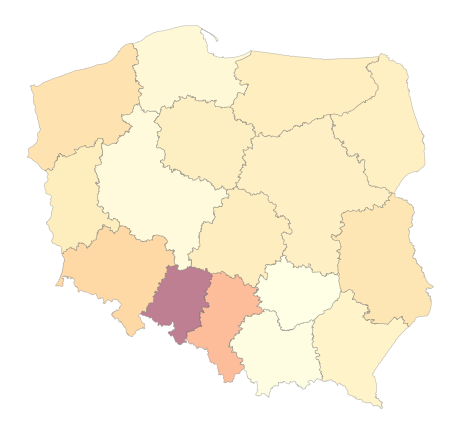

In [183]:
dane_mapa_woj = pd.merge(mapa_woj, df, how='left', left_on='JPT_KOD_JE', right_on='TERYT województwo')


fig, ax = plt.subplots(1, figsize = (8,8))
 
# rysowanie mapy
dane_mapa_woj.plot(column='%Duda', ax=ax, cmap='YlOrRd', linewidth=0.6, edgecolor='gray', alpha=0.5)
 
# usuwamy osie
ax.axis('off')
 
# pokazujemy obrazek
plt.show()

In [57]:
df.loc[(df['Numer obwodu'] == 69) & (df['Województwo'] == 'dolnośląskie')]

,Województwo,Gmina,TERYT gminy,Numer obwodu,Siedziba,Głosowanie rozpoczęło się w dniu,i trwało do godz,Liczba wyborców uprawnionych do głosowania,Komisja otrzymała kart do głosowania,Nie wykorzystano kart do głosowania,"Liczba wyborców, którym wydano karty do głosowania",Liczba wyborców głosujących przez pełnomocnika,Liczba wyborców głosujących na podstawie zaświadczenia,"Liczba wyborców, którym wysłano pakiety wyborcze",Liczba otrzymanych kopert zwrotnych,w których nie było oświadczenia,w których oświadczenie nie było podpisane,w których nie było koperty na kartę do głosowania,w których znajdowała się niezaklejona koperta,Liczba kopert na kartę do głosowania wrzuconych do urny,Liczba kart wyjętych z urny,w tym liczba kart wyjętych z kopert,Liczba kart nieważnych,Liczba kart ważnych,Liczba głosów nieważnych,Liczba głosów ważnych,RAZEM,Grzegorz Michał Braun,Andrzej Sebastian Duda,Adam Sebastian Jarubas,Bronisław Maria Komorowski,Janusz Ryszard Korwin-Mikke,Marian Janusz Kowalski,Paweł Piotr Kukiz,Magdalena Agnieszka Ogórek,Janusz Marian Palikot,Paweł Jan Tanajno,Jacek Wilk
1662,dolnośląskie,m. Wrocław,0,69,"Szkoła Podstawowa nr 12 , ul. Janiszewskiego 1...",10.05.2015 07:00:00,21:00:00,2024,1706,586,1120,0,36,0,0,0,0,0,0,0,1118,0,0,1118,8,1110,1110,25,262,6,463,60,2,246,13,19,10,4
1968,dolnośląskie,m. Wałbrzych,0,69,Specjalistyczny Szpital im. Alfreda Sokołowski...,10.05.2015 07:00:00,21:00:00,151,182,126,56,0,1,0,0,0,0,0,0,0,56,0,0,56,0,56,56,1,19,1,23,1,0,8,1,1,1,0


In [50]:
np.sum(df['TERYT gminy'].values)

0